# **IMPORTING LIBARARIES**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# **LOADING DATASET**

In [2]:
datset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/fruits quality analysis")

Found 14692 files belonging to 12 classes.


# **PREPROCESSING**

---



1.   PREPROCESSING OF TRAIN DATASET
2.   PREPROCESSING OF VALIDATION DATASET



In [3]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/fruits quality analysis",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.25,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 14692 files belonging to 12 classes.
Using 11019 files for training.


In [4]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/fruits quality analysis",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.25,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
  )

Found 14692 files belonging to 12 classes.
Using 3673 files for validation.


# **RESIZING THE IMAGE TO MATCH WITH THE CONVOLUTION FRAME SIZE**

In [5]:
from PIL import Image

target_size = (64, 64)  # Choose your target size

def resize_image(image_path):
    image = Image.open(image_path)
    resized_image = image.resize(target_size)
    return resized_image


In [6]:
import os

input_dir = "/content/drive/MyDrive/fruits quality analysis"
output_dir = "/content/drive/MyDrive/fruits quality analysis"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Resize and save images
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):  # Adjust the file extension as per your dataset
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        resized_image = resize_image(input_path)
        resized_image.save(output_path)


# **CONVOLUTIONAL NEURAL NETWORK**

In [7]:
cnn = tf.keras.models.Sequential()

USING OF RELU AMONG THE 3 ACTIVATION LAYERS .
CNN CONSISTS OF 3 WORKING PHASES .
SETTING OF 1ST CONVOLUTIONAL LAYER

1.   CONVOLUTING
2.   POOLING ( MAX POOLING & AVERAGE POOLING )
3. OUTPUT LAYERS



In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

2ND CONVOLUTIONAL LAYER

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

DROPOUT IS USED TO NOT LETTING THE MODEL OVERFIT

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

THE MODEL WILL BE IN THE FORMAT OF 2 X 2 MATRIX .
FLATTEN WILL CONVERT THE MATRIX INTO SINGLE ROW.

In [11]:
cnn.add(tf.keras.layers.Flatten())

DENSE IS USED TO PROVIDE THE LAYERS OF NEURONS IN HIDDEN LAYER OF CNN.
UNITS = 128 REPRESNTS THE NO OF NEURONS

In [12]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

HERE UNIT = 12 BECOZ THE OUTPUT NO OF CLASSES WE HAVE IN THE DATSET IS 12 CLASSES.

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=12,activation='softmax'))

# **COMPLING AND VISUALIZATION OF ACCURANCY**

COMPILE THE CNN ALGORITHM TO PREDICT THE ACCURANCY

In [14]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.layers[0].build((None, 128, 128, 3))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


THE PROVIDED DATASET IS OF VARING IMAGE SIZES SO WE ARE PROVIDING A CONSTANT IMAGE SIZE .

In [16]:
ds_train = ds_train.map(lambda x, y: (tf.image.resize(x, (64, 64)), y))
ds_validation = ds_validation.map(lambda x, y: (tf.image.resize(x, (64, 64)), y))

EPOCHS IS NO OF TIMES WE ARE FITTINH THE MODEL . WE ARE SSAVING THE ACCURANCY IN EACH PHASE OF EPOCHS.

In [17]:
cnn.reset_states()
training_history = cnn.fit(x = ds_train,validation_data = ds_validation,epochs=30)

Epoch 1/30
345/345 [==============================] - 2563s 7s/step - loss: 4.2202 - accuracy: 0.3201 - val_loss: 1.5689 - val_accuracy: 0.3972
Epoch 2/30
345/345 [==============================] - 192s 551ms/step - loss: 1.5313 - accuracy: 0.5451 - val_loss: 1.1833 - val_accuracy: 0.6221
Epoch 3/30
345/345 [==============================] - 200s 574ms/step - loss: 0.8641 - accuracy: 0.7287 - val_loss: 0.5940 - val_accuracy: 0.7920
Epoch 4/30
345/345 [==============================] - 186s 535ms/step - loss: 0.6733 - accuracy: 0.8014 - val_loss: 1.1811 - val_accuracy: 0.6597
Epoch 5/30
345/345 [==============================] - 201s 577ms/step - loss: 0.5065 - accuracy: 0.8415 - val_loss: 4.5031 - val_accuracy: 0.5176
Epoch 6/30
345/345 [==============================] - 189s 537ms/step - loss: 0.4707 - accuracy: 0.8624 - val_loss: 0.6079 - val_accuracy: 0.8222
Epoch 7/30
345/345 [==============================] - 197s 568ms/step - loss: 0.4272 - accuracy: 0.8828 - val_loss: 0.3744 - v

SAVING THE HISTORY IN JSON FORMAT

In [18]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LIST OF ACCURANCY AND LOSS VALUES

In [19]:
training_history.history

{'loss': [4.220235824584961,
  1.5312650203704834,
  0.8641114830970764,
  0.6732575297355652,
  0.5065478086471558,
  0.47065576910972595,
  0.42721450328826904,
  0.4128080904483795,
  0.35152867436408997,
  0.34177908301353455,
  0.3043060004711151,
  0.3000662326812744,
  0.2960536777973175,
  0.2803143262863159,
  0.24826066195964813,
  0.24358516931533813,
  0.23952767252922058,
  0.23794710636138916,
  0.18660138547420502,
  0.2531786859035492,
  0.20079617202281952,
  0.1956426352262497,
  0.18519705533981323,
  0.23676739633083344,
  0.22841010987758636,
  0.24258112907409668,
  0.2062211036682129,
  0.2103276252746582,
  0.22512300312519073,
  0.2333221584558487],
 'accuracy': [0.32008349895477295,
  0.5451492667198181,
  0.7287412881851196,
  0.8014338612556458,
  0.8415464162826538,
  0.8624194860458374,
  0.8828387260437012,
  0.8898266553878784,
  0.9026227593421936,
  0.909701406955719,
  0.9241310358047485,
  0.9285778999328613,
  0.9333877563476562,
  0.938288390636444

In [20]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

KEYS OF HISTORY FILE

In [21]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **CALUCATING THE ACCURARY OF THE VALIDATION DATASET**

In [26]:
print("validation datset accurancy :{}".format(training_history.history['val_accuracy'][-1]*100))

validation datset accurancy :93.05744767189026


# **ACCURANCY VISUIALZATION**

#TRAINING DATASET VISULIZATION

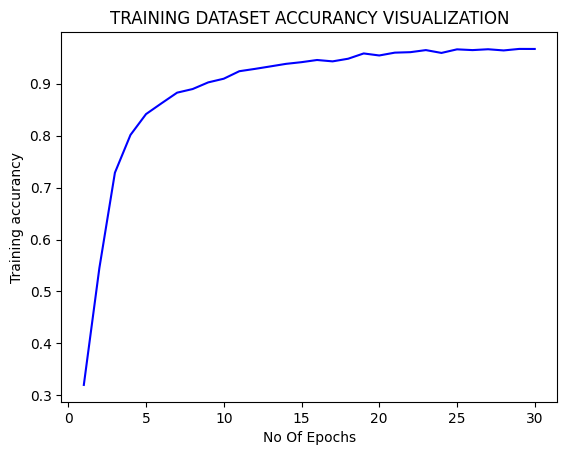

In [27]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='blue')
plt.xlabel('No Of Epochs')
plt.ylabel('Training accurancy')
plt.title("TRAINING DATASET ACCURANCY VISUALIZATION")
plt.show()

# Visualization of Validation Accuancy

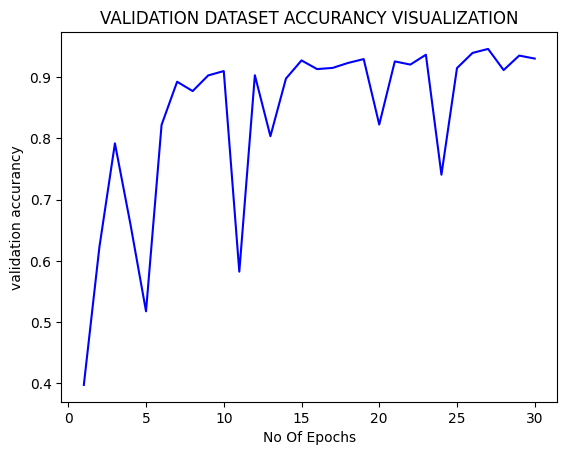

In [28]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No Of Epochs')
plt.ylabel('validation accurancy')
plt.title("VALIDATION DATASET ACCURANCY VISUALIZATION")
plt.show()